In [50]:
# % matplotlib inline
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import networkx as nx
from math import sqrt
import copy

In [51]:
data_1 = pd.read_excel('Data_1.xlsx')
data_2 = pd.read_excel('Data_2.xlsx')
data_1_len = len(data_1)
data_2_len = len(data_2)
# 垂直校准（垂直最大误差， 水平最大误差），水平校准（垂直最大误差， 水平最大误差），按规划前行最小误差，单位误差
data_1_param = [25, 15, 20, 25, 30, 0.001]
data_2_param = [20, 10, 15, 20, 20, 0.001]

print("data_1_len: ")
print(data_1_len)

print("data_2_len: ")
print(data_2_len)

data_1_len: 
613
data_2_len: 
327


d:\Anaconda\envs\pytorch\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [52]:
def get_data(data_frame, data_len):
    data_A_x = data_frame.iloc[0, 1]
    data_A_y = data_frame.iloc[0, 2]
    data_A_z = data_frame.iloc[0, 3]

    data_B_x = data_frame.iloc[data_len - 1, 1]
    data_B_y = data_frame.iloc[data_len - 1, 2]
    data_B_z = data_frame.iloc[data_len - 1, 3]

    data_start_end_x = [data_A_x, data_B_x]
    data_start_end_y = [data_A_y, data_B_y]
    data_start_end_z = [data_A_z, data_B_z]

    data_point_x = data_frame.iloc[:, 1].to_list()
    data_point_y = data_frame.iloc[:, 2].to_list()
    data_point_z = data_frame.iloc[:, 3].to_list()
    # data_1 vec(1) hor(0)
    data_vec_hor = data_frame.groupby(by='Type')
    data_hor = data_vec_hor.get_group(0)
    data_vec = data_vec_hor.get_group(1)

    data_vec_x = data_vec.iloc[:, 1].to_list()
    data_vec_y = data_vec.iloc[:, 2].to_list()
    data_vec_z = data_vec.iloc[:, 3].to_list()
    data_vec_index = data_vec.iloc[:, 0].to_list()

    data_hor_x = data_hor.iloc[:, 1].to_list()
    data_hor_y = data_hor.iloc[:, 2].to_list()
    data_hor_z = data_hor.iloc[:, 3].to_list()
    data_hor_index = data_hor.iloc[:, 0].to_list()
    return data_start_end_x, data_start_end_y, data_start_end_z, data_point_x, data_point_y, data_point_z, data_vec_x, data_vec_y, data_vec_z, data_vec_index, data_hor_x, data_hor_y, data_hor_z, data_hor_index

In [53]:
data_1_start_end_x, data_1_start_end_y, data_1_start_end_z, data_1_point_x, data_1_point_y, data_1_point_z, data_1_vec_x, data_1_vec_y, data_1_vec_z, data_1_vec_index, data_1_hor_x, data_1_hor_y, data_1_hor_z, data_1_hor_index = get_data(data_frame=data_1, data_len=data_1_len)
data_2_start_end_x, data_2_start_end_y, data_2_start_end_z, data_2_point_x, data_2_point_y, data_2_point_z, data_2_vec_x, data_2_vec_y, data_2_vec_z, data_2_vec_index, data_2_hor_x, data_2_hor_y, data_2_hor_z, data_2_hor_index = get_data(data_frame=data_2, data_len=data_2_len)

In [54]:
a_b_string = ['A', 'B']
data_1_start_end = [data_1_start_end_x, data_1_start_end_y, data_1_start_end_z]
data_1_vec_point = [data_1_vec_x, data_1_vec_y, data_1_vec_z]
data_1_hor_point = [data_1_hor_x, data_1_hor_y, data_1_hor_z]
data_1_point_array = [data_1_point_x, data_1_point_y, data_1_point_z]

data_2_start_end = [data_2_start_end_x, data_2_start_end_y, data_2_start_end_z]
data_2_vec_point = [data_2_vec_x, data_2_vec_y, data_2_vec_z]
data_2_hor_point = [data_2_hor_x, data_2_hor_y, data_2_hor_z]
data_2_point_array = [data_2_point_x, data_2_point_y, data_2_point_z]


In [55]:
def show_raw_plot(data_start_end, data_vec_point, data_hor_point):
    fig = plt.figure(figsize=(10, 10), dpi=100)
    # 创建3d绘图区域
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    ax.scatter3D(data_start_end[0], data_start_end[1], data_start_end[2], c='black')
    ax.scatter3D(data_vec_point[0], data_vec_point[1], data_vec_point[2], c='red')
    ax.scatter3D(data_hor_point[0], data_hor_point[1], data_hor_point[2], c='blue')

    for i in range(0, len(a_b_string)):
        ax.text(data_start_end[0][i], data_start_end[1][i], data_start_end[2][i], a_b_string[i])
    ax.set_title('Data plot')
    ax.plot3D(data_start_end[0], data_start_end[1], data_start_end[2], 'gray')
    plt.show()

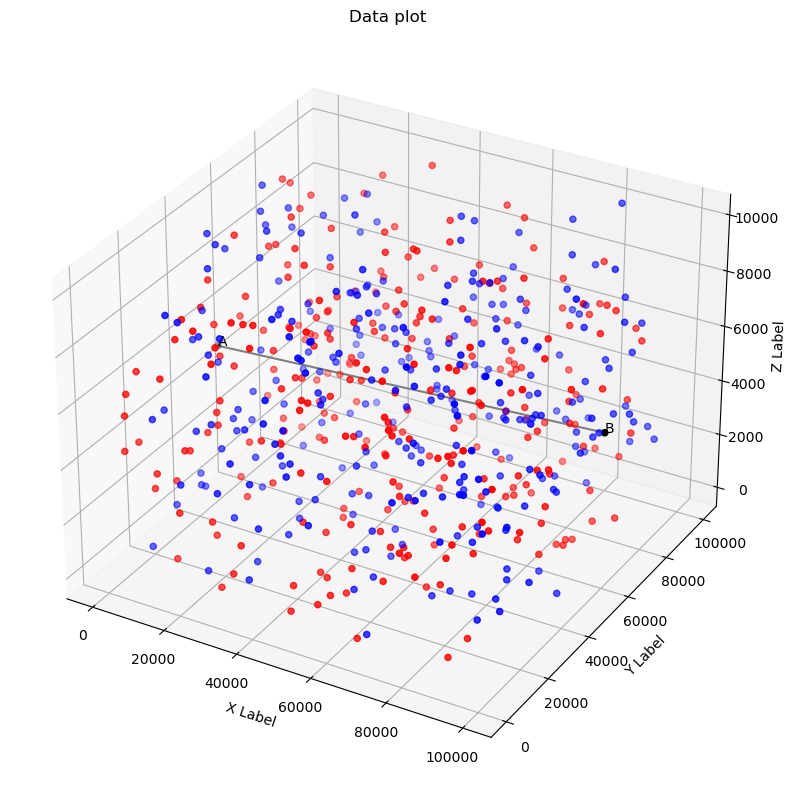

In [56]:
show_raw_plot(data_1_start_end, data_1_vec_point, data_1_hor_point)

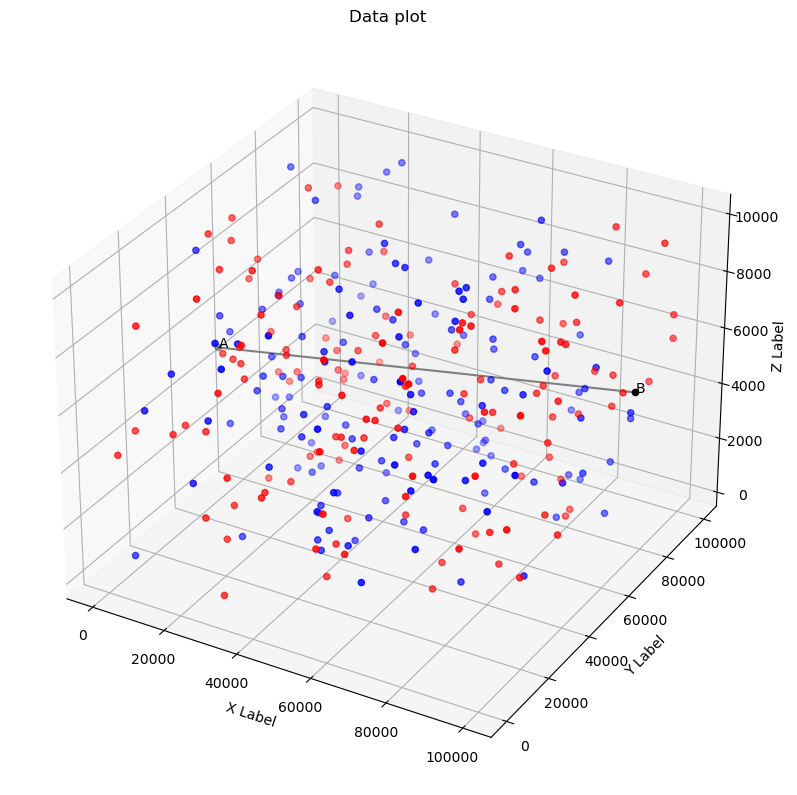

In [57]:
show_raw_plot(data_2_start_end, data_2_vec_point, data_2_hor_point)


In [58]:
def point_point_distance(x_1, y_1, z_1, x_2, y_2, z_2):
    p_p_distance = sqrt((x_1 - x_2) ** 2 + (y_1 - y_2) ** 2 + (z_1 - z_2) ** 2)
    return p_p_distance


def data_distance(index_0, index_1, data_point_array):
    temp_distance = point_point_distance(data_point_array[0][index_0], data_point_array[1][index_0], data_point_array[2][index_0],
                                         data_point_array[0][index_1], data_point_array[1][index_1], data_point_array[2][index_1])
    return temp_distance

In [59]:
data_inf = np.Inf

In [60]:
def data_process(data_point_array, data_len, data_param, data_vec_index, data_hor_index):
    data_mat = np.zeros((data_len, data_len))
    data_graph = np.zeros((data_len, data_len))
    # 上三角初始距离矩阵
    for i in range(0, data_len):
        for j in range(i, data_len):
            if i == j:
                data_mat[i][j] = data_inf
                data_graph[i][j] = 0
            # 同属于一个校正组
            elif i in data_hor_index and j in data_hor_index:
                data_mat[i][j] = data_inf
                data_graph[i][j] = 0
            elif i in data_vec_index and j in data_vec_index:
                data_mat[i][j] = data_inf
                data_graph[i][j] = 0
            else:
                dist = data_distance(i, j, data_point_array)
                if dist * data_param[-1] >= data_param[-2]:
                    data_mat[i][j] = data_inf
                    data_graph[i][j] = 0
                else:
                    data_mat[i][j] = dist
                    data_graph[i][j] = dist
    data_mat_T = data_mat.T
    # 距离的邻接矩阵
    data_mat_dist = data_mat + data_mat_T
    data_mat_dist_2 = copy.copy(data_mat_dist)
    
    # 距离筛选
    for i in range(0, data_len):
        for j in range(0, data_len):
            # 失衡飞行
            if data_mat_dist[i][j] * data_param[-1] >= data_param[-2]:
                data_mat_dist_2[i][j] = data_inf
            # j 为垂直校正点
            elif j in data_vec_index:
                if data_mat_dist_2[i][j] * data_param[-1] > data_param[0] or data_mat_dist_2[i][j] * data_param[-1] > \
                        data_param[1]:
                    data_mat_dist_2[i][j] = data_inf
            # j 为水平校正点
            elif j in data_hor_index:
                if data_mat_dist[i][j] * data_param[-1] > data_param[3] or data_mat_dist[i][j] * data_param[-1] > \
                        data_param[2]:
                    data_mat_dist_2[i][j] = data_inf
    return data_mat_dist, data_mat_dist_2

In [61]:
data_1_mat_dist, data_1_mat_dist_2 = data_process(data_1_point_array, data_1_len, data_1_param, data_1_vec_index, data_1_hor_index)
data_2_mat_dist, data_2_mat_dist_2 = data_process(data_2_point_array, data_2_len, data_2_param, data_2_vec_index, data_2_hor_index)

In [62]:
def get_data_buff(data_len, data_vec_index, data_hor_index, data_mat_dist_2, data_param):
    data_vec_buff = [0] * data_len
    data_hor_buff = [0] * data_len
    for i in range(0, data_len):
        if i in data_vec_index:
            data_vec_buff[i] = 0
            data_hor_buff[i] = data_mat_dist_2[0][i] * data_param[-1]
        elif i in data_hor_index:
            data_vec_buff[i] = data_mat_dist_2[0][i] * data_param[-1]
            data_hor_buff[i] = 0
        else:
            data_vec_buff[i] = data_mat_dist_2[0][i] * data_param[-1]
            data_hor_buff[i] = data_mat_dist_2[0][i] * data_param[-1]
    return data_vec_buff, data_hor_buff

In [63]:
data_1_vec_buff, data_1_hor_buff = get_data_buff(data_1_len, data_1_vec_index, data_1_hor_index, data_1_mat_dist_2, data_1_param)
data_2_vec_buff, data_2_hor_buff = get_data_buff(data_2_len, data_2_vec_index, data_2_hor_index, data_2_mat_dist_2, data_2_param)

In [64]:
def dijkstra(matrix, start_point, end_point, path_num, data_param, data_vec_buff, data_hor_buff, data_vec_index, data_hor_index):
    matrix_len = len(matrix)
    path_array = []  # 用于保存路径
    temp_array = []  # 用于复制
    path_array.extend(matrix[start_point])
    temp_array.extend(matrix[start_point])

    # 从start_point点经过路径，到达该点的误差
    path_vec_array = copy.copy(data_vec_buff)
    path_hor_array = copy.copy(data_hor_buff)

    temp_array[start_point] = data_inf  # 处理过得节点变成inf, 表示不是最小权值的节点
    visited = [start_point]  # 用于保存处理过得节点
    path_parent = [start_point] * matrix_len  # 初始父节点都为start_point

    while len(visited) < matrix_len:
        i = temp_array.index(min(temp_array))  # 从最近开始寻找
        path_vector = [i]
        temp_array[i] = data_inf  # 已处理变为inf
        path = [str(i)]  # 用于画路径
        k = i
        t = 0
        while path_parent[k] != start_point:  # 找该节点的父节点添加到path，直到父节点是start
            path.append(str(path_parent[k]))
            k = path_parent[k]
            path_vector.append(k)
            t = t + 1
        path.append(str(start_point))
        path_vector.append(start_point)
        path_vector.reverse()
        path.reverse()  # path反序产生路径
        # print(str(i) + ':', '->'.join(path))
        visited.append(i)  # 该索引已经处理了
        if i == end_point:
            print("point_num: ", t)
            return path_array, path_vector, path_vec_array, path_hor_array
        for j in range(matrix_len):
            if j not in visited and t < path_num:
                # 当前点的距离到j点距离，比现有0点到j点的最近距离还要小
                if path_array[i] + matrix[i][j] < path_array[j]:
                    vec_buff_temp = path_vec_array[i] + matrix[i][j] * data_param[-1]
                    hor_buff_temp = path_hor_array[i] + matrix[i][j] * data_param[-1]
                    if j in data_vec_index and vec_buff_temp <= data_param[0] and hor_buff_temp <= data_param[1]:
                        path_vec_array[j] = 0
                        path_hor_array[j] = hor_buff_temp
                        path_array[j] = temp_array[j] = path_array[i] + matrix[i][j]
                        path_parent[j] = i  # 说明父节点是i
                    elif j in data_hor_index and vec_buff_temp <= data_param[2] and hor_buff_temp <= data_param[
                        3]:
                        path_vec_array[j] = vec_buff_temp
                        path_hor_array[j] = 0
                        path_array[j] = temp_array[j] = path_array[i] + matrix[i][j]
                        path_parent[j] = i  # 说明父节点是i
                    elif j == matrix_len - 1 and vec_buff_temp < data_param[-2] and hor_buff_temp < data_param[-2]:
                        path_array[j] = temp_array[j] = path_array[i] + matrix[i][j]
                        path_parent[j] = i  # 说明父节点是i
                        path_vec_array[j] = vec_buff_temp
                        path_hor_array[j] = hor_buff_temp
    return path_array, path_vector

In [65]:
data_1_path, data_1_path_vector, data_1_path_vec_buff, data_1_path_hor_buff = dijkstra(data_1_mat_dist_2, 0, data_1_len-1, 8, data_1_param, data_1_vec_buff, data_1_hor_buff, data_1_vec_index, data_1_hor_index)
print("path_len: " + str(data_1_path[-1]))
print("path: " + str(data_1_path_vector))
for path_point in data_1_path_vector:
    print("point_index: " + str(path_point) + " vec_buff: " + str(data_1_path_vec_buff[path_point]) + " hor_buff: " + str(data_1_path_hor_buff[path_point]))
    


point_num:  8
path_len: 104898.37486666346
path: [0, 503, 69, 237, 155, 338, 457, 555, 436, 612]
point_index: 0 vec_buff: inf hor_buff: inf
point_index: 503 vec_buff: 0 hor_buff: 13.387919852713356
point_index: 69 vec_buff: 8.80734226702942 hor_buff: 0
point_index: 237 vec_buff: 0 hor_buff: 12.499483115931424
point_index: 155 vec_buff: 11.200817369607286 hor_buff: 0
point_index: 338 vec_buff: 0 hor_buff: 12.185800084498263
point_index: 457 vec_buff: 12.81307763497485 hor_buff: 0
point_index: 555 vec_buff: 0 hor_buff: 11.690242752987407
point_index: 436 vec_buff: 7.355848347169227 hor_buff: 0
point_index: 612 vec_buff: 22.313691788921446 hor_buff: 14.957843441752217


In [66]:
data_2_path, data_2_path_vector, data_2_path_vec_buff, data_2_path_hor_buff = dijkstra(data_2_mat_dist_2, 0, data_2_len-1, 15, data_2_param, data_2_vec_buff, data_2_hor_buff, data_2_vec_index, data_2_hor_index)
print("path_len: " + str(data_2_path[-1]))
print("path: " + str(data_2_path_vector))
for path_point in data_2_path_vector:
    print("point_index: " + str(path_point) + " vec_buff: " + str(data_2_path_vec_buff[path_point]) + " hor_buff: " + str(data_2_path_hor_buff[path_point]))
    

point_num:  12
path_len: 110772.81584923199
path: [0, 163, 114, 8, 309, 121, 123, 45, 160, 92, 93, 61, 292, 326]
point_index: 0 vec_buff: inf hor_buff: inf
point_index: 163 vec_buff: 13.287897610451276 hor_buff: 0
point_index: 114 vec_buff: 0 hor_buff: 5.334153323965658
point_index: 8 vec_buff: 13.921985777966604 hor_buff: 0
point_index: 309 vec_buff: 0 hor_buff: 5.5243254013786816
point_index: 121 vec_buff: 11.252042644972965 hor_buff: 0
point_index: 123 vec_buff: 0 hor_buff: 5.3516002441665425
point_index: 45 vec_buff: 10.006161417472903 hor_buff: 0
point_index: 160 vec_buff: 0 hor_buff: 7.48513454729585
point_index: 92 vec_buff: 5.776163625358746 hor_buff: 0
point_index: 93 vec_buff: 0 hor_buff: 9.484718395650237
point_index: 61 vec_buff: 9.834209701690867 hor_buff: 0
point_index: 292 vec_buff: 0 hor_buff: 6.5539138840830065
point_index: 326 vec_buff: 6.960509274778634 hor_buff: 13.51442315886164


In [81]:
def index_to_point(index_array, raw_point_array, vec_index, hor_index):
    vec_array_x = []
    vec_array_y = []
    vec_array_z = []
    
    hor_array_x = []
    hor_array_y = []
    hor_array_z = []
    
    point_array_x = []
    point_array_y = []
    point_array_z = []
    
    for index in index_array:
        point_array_x.append(raw_point_array[0][index])
        point_array_y.append(raw_point_array[1][index])
        point_array_z.append(raw_point_array[2][index])
        if index in  vec_index:
            vec_array_x.append(raw_point_array[0][index])
            vec_array_y.append(raw_point_array[1][index])
            vec_array_z.append(raw_point_array[2][index])
        elif index in hor_index:
            hor_array_x.append(raw_point_array[0][index])
            hor_array_y.append(raw_point_array[1][index])
            hor_array_z.append(raw_point_array[2][index])
    point_array = [point_array_x, point_array_y, point_array_z]
    vec_array = [vec_array_x, vec_array_y, vec_array_z]
    hor_array = [hor_array_x, hor_array_y, hor_array_z]
    
    return point_array, vec_array, hor_array

In [70]:
# data_1_path_vector[0]
data_1_point_np = np.array(data_1_point_array)
data_2_point_np = np.array(data_2_point_array)

data_1_point_np[:,0]

test_array = []
test_array.append(data_1_point_np[:, data_1_path_vector[0]])
test_array.append(data_1_point_np[:, data_1_path_vector[1]])
# test_array
# data_1_point_array[0][1]
print(data_1_path_vector)
data_1_point_array[0][612]
print(data_2_path_vector)
data_2_point_array[0][326]
data_1_point_array[0][0]
print(len(data_1_point_array))


[0, 503, 69, 237, 155, 338, 457, 555, 436, 612]
[0, 163, 114, 8, 309, 121, 123, 45, 160, 92, 93, 61, 292, 326]
3


In [82]:
data_1_show_plot_point_array, data_1_show_plot_vec_array, data_1_show_plot_hor_array = index_to_point(data_1_path_vector, data_1_point_array, data_1_vec_index, data_1_hor_index)
data_2_show_plot_point_array, data_2_show_plot_vec_array, data_2_show_plot_hor_array = index_to_point(data_2_path_vector, data_2_point_array, data_2_vec_index, data_2_hor_index)

In [83]:
def show_process_plot( data_start_end, show_plot_point_array, show_plot_vec_array, show_plot_hor_array):
    fig = plt.figure(figsize=(10, 10), dpi=100)
    # 创建3d绘图区域
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    ax.scatter3D(data_start_end[0], data_start_end[1], data_start_end[2], c='yellow')
    ax.scatter3D(show_plot_vec_array[0], show_plot_vec_array[1], show_plot_vec_array[2], c='red')
    ax.scatter3D(show_plot_hor_array[0], show_plot_hor_array[1], show_plot_hor_array[2], c='blue')

    # for i in range(0, len(a_b_string)):
    #     ax.text(data_start_end[0][i], data_start_end[1][i], data_start_end[2][i], a_b_string[i])
    ax.set_title('Data plot')
    ax.plot3D(show_plot_point_array[0], show_plot_point_array[1], show_plot_point_array[2], 'black')
    plt.show()

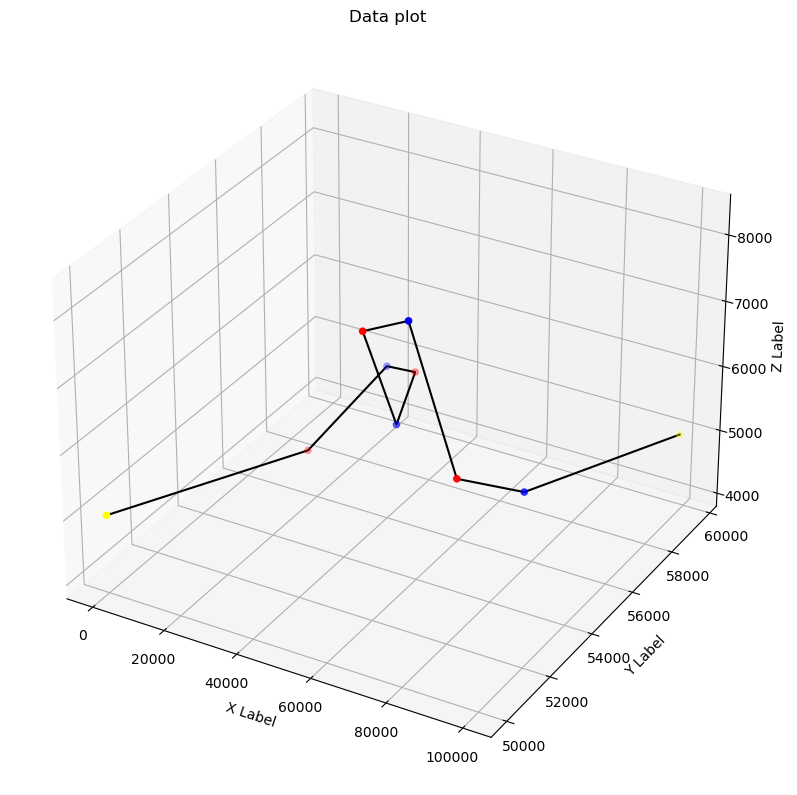

In [84]:
show_process_plot(data_1_start_end, data_1_show_plot_point_array, data_1_show_plot_vec_array, data_1_show_plot_hor_array)

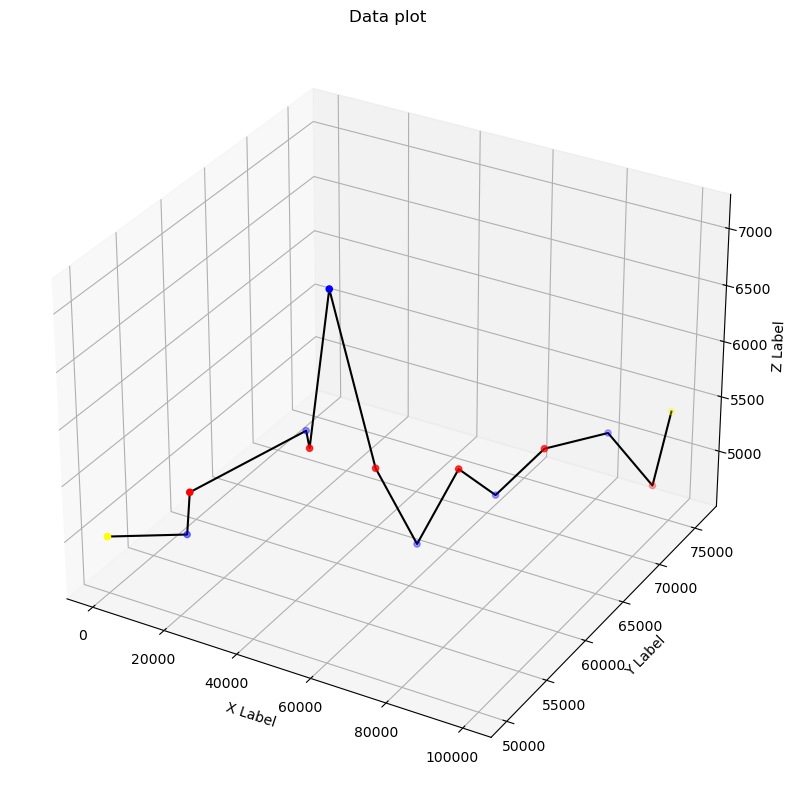

In [85]:
show_process_plot(data_2_start_end, data_2_show_plot_point_array, data_2_show_plot_vec_array, data_2_show_plot_hor_array)
